# <center>Python programming 3 – Advanced features<br/>Code optimization</center>
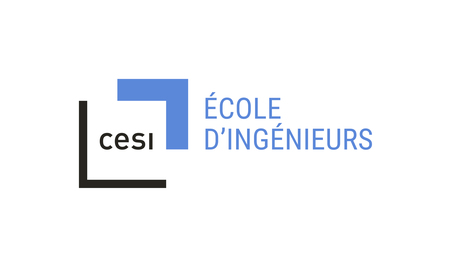

<blockquote>
    <h1><center>Tutor guide</center></h1>
    <table >
        <tr>
            <th style="text-align:center;">Version</th>
            <th style="text-align:center;">Date</th>
            <th style="text-align:left;">Designer</th>
            <th style="text-align:left;">Proofreader </th>
            <th style="text-align:left;">English translator</th>
            <th style="text-align:left;">Comments</th>
        </tr><tr>
            <td style="text-align:center;">1.1</td>
            <td style="text-align:center;">03/02/2023</td>
            <td style="text-align:left;"><a href="mailto:bcohen@cesi.fr">Benjamin COHEN BOULAKIA</a></td>
            <td style="text-align:left;"></td>
            <td style="text-align:left;"></td>
            <td style="text-align:left;">Translation of the code into English, in view of the translation of the entire Notebook</td>
        </tr><tr>
            <td style="text-align:center;">1.0</td>
            <td style="text-align:center;">15/03/2022</td>
            <td style="text-align:left;"><a href="mailto:bcohen@cesi.fr">Benjamin COHEN BOULAKIA</a></td>
            <td style="text-align:left;"></td>
            <td style="text-align:left;"></td>
            <td style="text-align:left;">Original version</td>
        </tr>
    </table>
This tutorial must be done by the students. It introduces Python’s advanced capabilities that will be used in all Workshops (except for the second one), and these features are considered mastered by the students.
    
The main focus of this tutorial is on code performance. This subject is not comprehensively covered, but focuses on those aspects that are directly relevant to this course. An opportunity to explore the subject as a whole is proposed at the end (particularly with regard to profiling tools), but this is not compulsory.
    
Students must run all of cells, and understand the corresponding explanations. Ideally, they will experiment based on the examples. Please note that some cells will produce an error. The purpose is to illustrate the limitations of this programming language.
</blockquote>

# Introduction
You’ve already used Python before, but as part of this course, you’ll be pushing the language (and your computers) to the limit&nbsp;! The algorithms that you will design and implement will really put a strain on your CPUs. This is perfectly normal, since the problems we will be tackling in the coming weeks are among the toughest that Computer Science has to address.

However, although the optimization of these algorithms is crucial to achieving good results (this matter will be brought up again throughout the course), their implementation also plays an important role. The same algorithm can be implemented in several different ways, which may have very different behaviour from each other. If you don’t make the right technical choices, a very well-designed algorithm may very well turn out to be unusable (in contrast, even if very well implemented, an inefficient algorithm will not be able to produce good results, but that’s not the point here).

And that’s where this exercise series comes in. The goal here is to learn how to use some of Python’s advanced features, which will be used throughout the course, and which will play an important role in the execution speed of your code. **It is in your best interest to properly study the tools that we will discuss, otherwise you might lose a lot of time during the Workshops**.

Obviously, we will not discuss all the possibilities offered by Python, but we will focus on two aspects&nbsp;:
* **Data structures**. This notion is key in algorithmics (as you will find out), and choosing a suitable structure for the processed problem can make all the difference in terms of performance.
* **Processing tasks** and **control structures**. Apart from the classic <code class="cm-s-ipython language-python"><span class="cm-keyword">if</span></code> and <code class="cm-s-ipython language-python"><span class="cm-keyword">while</span></code> loops (that you already know), Python provides much more advanced functions and processing structures, which have the advantage of producing code that is both concise and efficient. Mastering these features will allow you to implement an algorithm extremely fast, without compromising its execution speed, simply because, although Python is an interpreted language, many features are directly implemented in C).

Note that Python’s object-oriented programming aspects are not discussed here at all (apart from the use of standard objects that implement the data structures mentioned above).

Now, let’s get started. Read the explanations about the programming techniques we will discover in this Notebook, run the code cells illustrating these techniques one by one, and feel free to modify them to understand how they work. It is also highly recommended to follow the links scattered throughout this Notebook, as they will strengthen your computer literacy and help you understand the tools we are discussing.

# 1 Data structures

Here, we will mainly focus on data grouping. Python, like most programming languages, allows users to manipulate groups of elements (arrays, for example). They are generally referred to as _containers_. There are several kinds of containers, based on different data structures, each structure with its advantages and disadvantages. Therefore, it is necessary to know their strengths and weaknesses, in order to choose the structure that is best suited to the need.

However, all these containers have many uses in common, so let’s have a look at them. We will illustrate these functions on a list, which is the most flexible container, but it should be emphasised that all these manipulations apply to all types of containers.

## 1.1 Containers

First of all, we can insert objects of various types (we are not required to have only one type at a time).

In [1]:
my_list = [1, 2.0, "three", "FOUR", 5, 6.0]

print(my_list)

[1, 2.0, 'three', 'FOUR', 5, 6.0]


To simply access the data of a container we use _indexing_, which is based on the square brackets (`[]`). 

In [2]:
print(my_list[2])

three


Once again, this indexing syntax is common to all containers, not just lists (unlike the initialization in the first cell, which is specific to lists, but we will see that further below).

Obviously, if we try to access a non-existent cell, we will get an error message&nbsp;:

In [3]:
print(my_list[50]) # generates an error

IndexError: list index out of range

To avoid this kind of error, being able to determine the size of a container is useful&nbsp;:

In [15]:
print(len(my_list))

6


Here’s an interesting possibility&nbsp;: accessing the elements of a container starting from the end rather than the beginning. To do this, we just have to use a negative index (with -1 being the end of the container).

In [16]:
print(my_list[-1])
print(my_list[-2])

6.0
5


There’s nothing new so far. But we can further explore the concept of indexing thanks to _slicing_. The idea is to generalize the access principle by index to obtain a subset of values of the starting container rather than a value. We can specify bounds, only the upper bound, or only the lower bound&nbsp;:

In [17]:
print(my_list[2:4])
print(my_list[:2])
print(my_list[2:])

['three', 'FOUR']
[1, 2.0]
['three', 'FOUR', 5, 6.0]


<div class="alert alert-warning">Beware that one of the bounds is open and the other is closed, as you will notice. If you are wondering why, the answer is in this code&nbsp;:</div>

In [18]:
print(my_list)
print(my_list[:2] + my_list[2:])

[1, 2.0, 'three', 'FOUR', 5, 6.0]
[1, 2.0, 'three', 'FOUR', 5, 6.0]


We can even specify a step, i.e. the interval between two elements. Let’s say that we want to display every other element, between 1 and 5&nbsp;:

In [19]:
print(my_list[1:5:2])

[2.0, 'FOUR']


It can even be used to invert a list, using a negative step&nbsp;!

In [20]:
print(my_list[::-1])

[6.0, 5, 'FOUR', 'three', 2.0, 1]


Besides, index problems are quite well handled, since slicing does not cause any memory overflow, even if the index is not good&nbsp;:

In [21]:
print(my_list[2:50])

['three', 'FOUR', 5, 6.0]


That said, do not adopt bad habits. Always keep the indices of your structures under control&nbsp;!

Checking if a value is present in a container is very simple, with the keyword <code class="cm-s-ipython language-python"><span class="cm-keyword"><span class="cm-keyword">in</span></code></span></code>&nbsp;:

In [2]:
print(2 in my_list) # the use of an `if` is completely useless!

True


If we need to manipulate matrices, 3-dimensional arrays, or even arrays with more dimensions, everything is done as in most languages, so nested containers must be used&nbsp;:

In [5]:
my_matrix = [
 [0, 1, 2],
 [3, 4, 5],
 [6, 7]
]

print(my_matrix)

[[0, 1, 2], [3, 4, 5], [6, 7]]


You will also notice that Python does not require that all nested containers have the same size. Another detail&nbsp;: we have nested lists here, but you can nest any type of container in any other type.

An extremely important remark - containers are references (i.e. pointers) to objects (within the meaning of object-oriented programming). So, if you assign a container to another variable, you will not have created a new container, but a new reference to the same container. In the case of a container whose contents can be modified (which is not the case for all), this changes everything&nbsp;:

In [25]:
print(my_list)

my_other_list = my_list
my_other_list[1] = 0

print(my_list)
print(my_other_list)

[1, 2.0, 'three', 'FOUR', 5, 6.0]
[1, 0, 'three', 'FOUR', 5, 6.0]
[1, 0, 'three', 'FOUR', 5, 6.0]


both `my_list` and `my_other_list` refer to the same list, and modifying the contents from one container also modifies the contents for the other one&nbsp;:

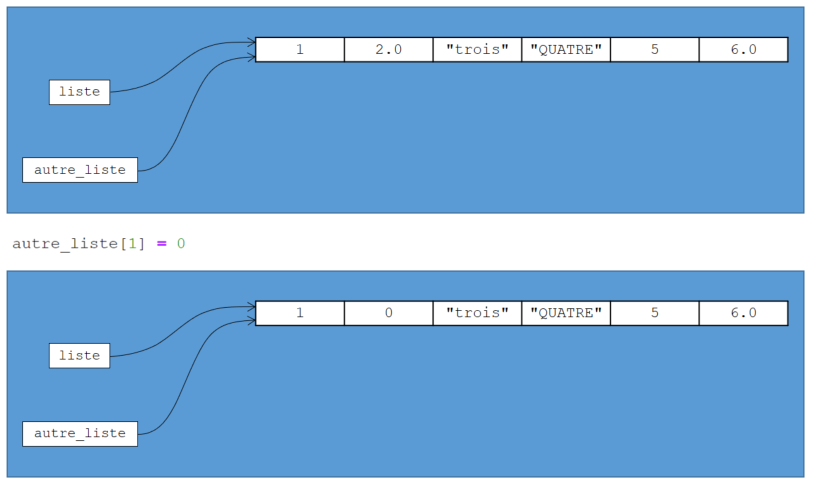

If you really want to make a copy of this container, the [shallow or deep copy](https://docs.python.org/fr/3/library/copy.html) functions will be useful to you. And if you’re not familiar with these reference matters, use [Python Tutor](https://pythontutor.com/visualize.html#mode=edit), to clarify them. For example, run a small code similar to the following&nbsp;:
```python
import copy
my_list = [1, 2.0, "three", "FOUR", 5, 6.0]

my_other_list = my_list
my_other_list[0] = 0
my_other_list = copy.copy(my_list)
my_other_list[0] = 1
```
And if you don’t understand the difference between shallow and deep copy, do the same with a matrix and test both copy methods with [Python Tutor](https://pythontutor.com/python-debugger.html#mode=edit).

That’s the general principle. Let’s now see the specific characteristics of each container.

## 1.2 Lists
A list is the most flexible container in Python. This is the one we have used in the examples above. A list can be modified, increased, decreased, by index or by value...

In [26]:
my_list = [1, 2.0, "three"]
print(my_list)

my_list[2] = "THREE"
print(my_list)

my_list.append("four")
print(my_list)

my_list.remove(1) # deletion by value
print(my_list)

my_list.pop(0) # deletion by index
print(my_list)

[1, 2.0, 'three']
[1, 2.0, 'THREE']
[1, 2.0, 'THREE', 'four']
[2.0, 'THREE', 'four']
['THREE', 'four']


Resizing is done automatically as additions and deletions are made. Be careful not to delete an element that does not exist&nbsp;:

In [27]:
my_list.remove(0) # generates an error

ValueError: list.remove(x): x not in list

In [31]:
my_list.pop(10) # generates an error

IndexError: pop index out of range

And lists provide [many other manipulation methods](https://docs.python.org/3/tutorial/datastructures.html) (insertion at a specific location, list merging, value counting, sorting, inverting, replacing, queue and stack operations...).

As you can see, lists are a particularly flexible structure. But all of these features come at a cost. In fact, what this implies is that lists are very complex objects. And this sophistication does not come cheap. Even if the toll is paid at the time of instantiation. Creating a list takes time (as it does for any object, but especially for lists). You probably never realized this amount of time because it’s still insignificant on small amounts of data. But you will soon feel the difference.

So what else can we use besides lists&nbsp;?

## 1.3 Tuples

Tuples are another type of container. Let’s see a simple example&nbsp;:

In [36]:
a = 1, 2
b = (3, 4, 5)
c, d = 6, 7

print(a)
print(b[2])
print(len(b))
print(c)
print(d) 

(1, 2)
5
3
6
7


You will notice that explicit values (used here for initialization) are represented with brackets (which are optional, by the way). This is very convenient, as it allows us, for example, to write a function that returns several values, in the form of tuple, which we then distribute in several variables:

In [4]:
def my_function():
 return 2,3

a, b = my_function()
print(a)
print(b)

2
3


<div class="alert alert-warning">However, be careful not to overuse this possibility, or you may end up with a function that is difficult to understand.</div>

There is, however, one special aspect&nbsp;: The statement of a tuple containing a single value. In this case, the syntax&nbsp;:
```python
a = (1)
```

will not work because it will create an integer of value 1 (here, the brackets are interpreted by Python as a simple value delimiter). The solution is to add a comma after the value, to explicitly state a tuple&nbsp;:<br/>

```python
a = (1,)
```

But what is relevant to us, and what makes the big difference compared to lists, is that tuples are [immutable](https://en.wikipedia.org/wiki/Immutable_object). Therefore, it’s impossible to modify one of the elements of a tuple. The proof is that the second instruction of the following code produces an error&nbsp;:

In [37]:
print (a[0])
a[0] = 0 # generates an error
print (a[0])

1


TypeError: 'tuple' object does not support item assignment

This limitation is huge&nbsp;! Once a tuple is created, it cannot be modified. But if these tuples are so inflexible, why use them&nbsp;?

Quite simply because this sacrifice in terms of functionality allows them to have [significantly lower use costs than lists](https://learnbatta.com/blog/why-tuple-is-faster-than-list-in-python-22/). In fact, this can be easily checked by looking at the time it takes to create a list. To measure this running time, there are [several tools](https://docs.python.org/fr/3/library/timeit.html) in Python, but it’s very simple to do in a Jupyter Notebook. We will use a [magic command] (https://ipython.readthedocs.io/en/stable/interactive/magics.html) to run an instruction a large number of times and measure its statistical performance&nbsp;:

In [43]:
%%timeit # measures the average running time (with standard deviation) of the cell
x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

62.4 ns ± 5.9 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


While comparing with the time it takes to create a tuple with the same values&nbsp;:

In [44]:
%%timeit # measures the average running time (with standard deviation) of the cell
x=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

13.1 ns ± 1.16 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


This represents, approximately, a factor of 4 (depending on the machine)&nbsp;! Bear in mind that this time is the time used by the command in the CPU, so even if your machine is doing other things at the same time, this measurement is meaningful.

Obviously, for instantiating a structure of 10 numbers, it makes no difference. But in our case, and without anticipating the rest of the course, we will implement algorithms that will iterate a very large number of times and directly generate a large amount of data, which once created is merely evaluated (some data will be kept, other discarded). In this case, the performance of tuples will be much more relevant to us than the use flexibility of lists, which we do not really need. If we divide the time needed to create a list by 4 at each iteration, on algorithms that iterate hundreds of thousands of times on sequences containing several tens of thousands of elements, we will quickly feel the difference&nbsp;!

## 1.4 Stacks and queues
As a reminder, queues are also called *FIFO*, which stands for *First In, First Out*, and stacks are also called *LIFO*, which stands for *Last In, First Out*.
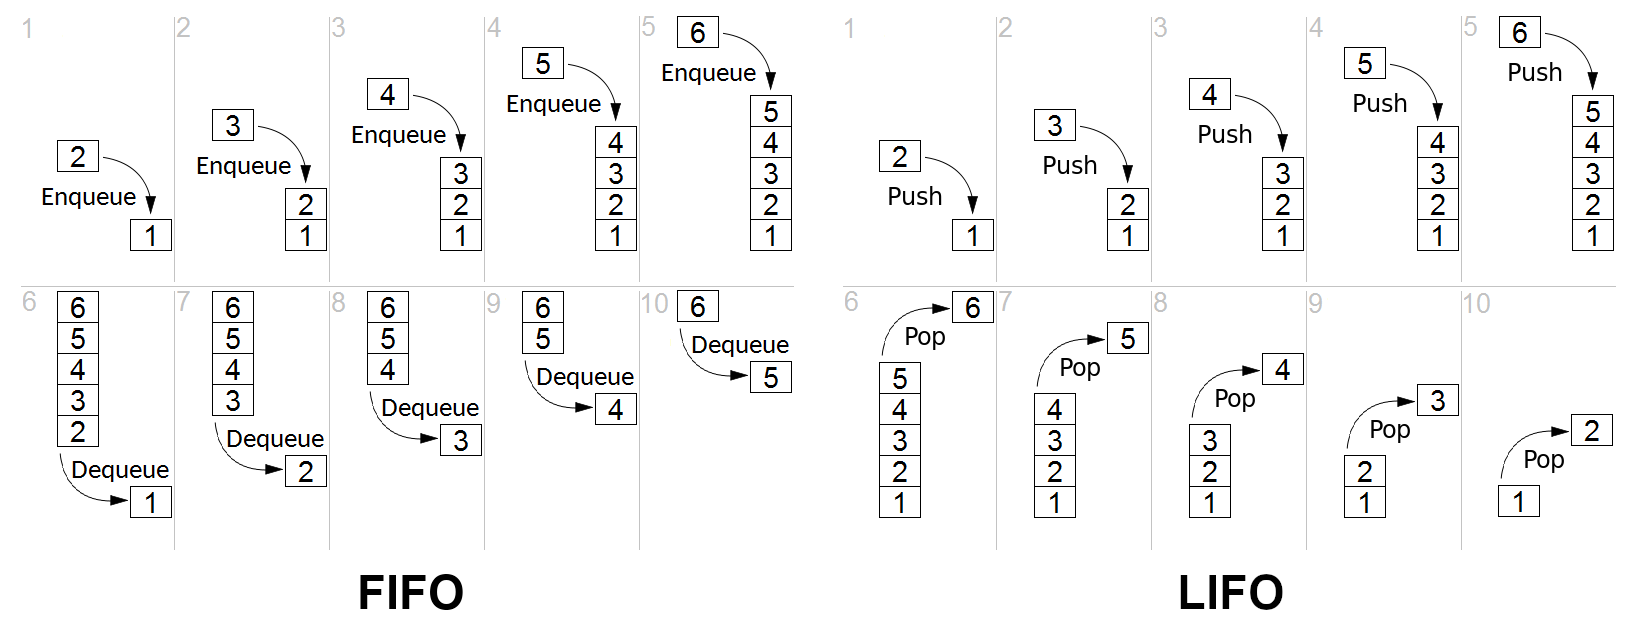

These structures can be very useful (and we will use them several times in this course). A queue, for example, will be implemented in a server that receives requests and processes them in order of arrival. A stack makes it possible to encapsulate recursive calls or processing tasks (by the way, a call to a recursive function only stacks [execution contexts](https://en.wikipedia.org/wiki/Context_(computing)) thanks to the [context switch](https://en.wikipedia.org/wiki/Context_switch) process.

Lists can easily be managed as stacks or queues - simply use the `pop()` and `append()` methods. However, also in this case, if our use is only limited to these operations, lists will not be the most efficient structure. In fact, list manipulation operations are optimized for contents whose quantity doesn’t vary too much (that doesn’t mean that it doesn’t work if it’s the other way around, only that it will be slower).

The [`Collection`](https://docs.python.org/3/library/collections.html) library provides a structure called `deque` (that is pronounced as *deck* and stands for ‘double-ended queue’), which performs FIFO and LIFO operations with [very high performance](https://dev.to/v_it_aly/python-deque-vs-listwh-25i9). More specifically, addition and deletion at the beginning are done in constant time. This is what $O(1)$, shown in the previous link, means. In the first sequence of this course, you will find out exactly how this term is interpreted, but what it intuitively implies is that in a list, stack or queue operations will take longer and longer as the list size increases (which makes sense if we think about it, because to add anywhere other than the end of a list, we have to reallocate memory and move the existing contents), whereas with a `deque`, no matter how many values are in the queue/stack, these operations will take the same amount of time. And for computationally intensive algorithms, when we know that we will only need stack and/or queue operations, this capability is a valuable asset&nbsp;!

Besides, `deque` is very simple to use&nbsp;:

In [45]:
from collections import deque

queue = deque((1, '2', 'three'))
print(queue)

queue.pop()
print(queue)

queue.append('THREE')
print(queue)

queue.popleft()
print(queue)

deque([1, '2', 'three'])
deque([1, '2'])
deque([1, '2', 'THREE'])
deque(['2', 'THREE'])


You can find the `pop()` method in the list, but this time without a parameter (since we have a stack/queue, there’s no need to specify).

Note that `deque` was created from a tuple. In fact, any sequence will do, but if you have many instantiations to do, it will run faster with a tuple.

## 1.5 Dictionaries
Let’s say we have an array, and we want to use some of the cells in that array, but not all of them every time. Which structure should we use&nbsp;? We might be tempted to say&nbsp;: if this data doesn’t change, we might as well use tuples because they are faster. Otherwise, lists.

But there is another data structure, the [dictionaries] (https://www.programiz.com/python-programming/dictionary). A dictionary is very similar to a list, except that in a dictionary we explicitly specify the key, which serves as an identifier for the value we want to store. A bit like the index in the list, but with any values. And even of any type&nbsp;!

In [46]:
my_dict = {
 "key 1" : "value 1",
 "key 2" : 2,
 3 : "value 3"
}

print(my_dict)

{'key 1': 'value 1', 'key 2': 2, 3: 'value 3'}


You will notice that the values can also be of any type.

The advantage of these dictionaries is that they are based on a [hash table] (https://en.wikipedia.org/wiki/Hash_table), which [enables them to access an element in $O(1)$ whose key we know](https://thecodingbot.com/time-complexity-analysis-of-python-dictionarys-get-method/). As with `deque`, if we had used a list, as the list would fill up, it would be increasingly difficult to access, and the same goes for tuples. When we know that we will need to access some well-identified data from our sequence , this capability is very useful&nbsp;!

An important aspect&nbsp;: dictionaries are mutable just like lists&nbsp;:

In [47]:
my_dict[3] = 3
my_dict["4"] = "four"
print(my_dict)

{'key 1': 'value 1', 'key 2': 2, 3: 3, '4': 'four'}


There are other manipulation functions, but obviously not as many as for lists. More specifically, we cannot slice a dictionary.

One last detail&nbsp;: Since Python version 3.6, the insertion order of elements in a dictionary has been kept (you will find many obsolete resources stating the opposite on the Web). 

## 1.6 Sets

Python allows us to manipulate sets of elements within the algebraic meaning. These elements are gathered, but there is no notion of order. This makes them a rather unique type of container. For example, a direct consequence of their lack of order is that we cannot slice them (the same reason why it doesn’t work on dictionaries). And the fact that we are dealing with an algebraic set implies a property&nbsp;: a value cannot be present twice. Imagine the set of integers $\mathbb{N}$. We don’t expect the value $1$ to be present in two copies. It wouldn’t make sense. It’s the same here&nbsp;:

In [48]:
my_set = {1, 2, 3}
print(my_set)

my_set.add(4)
print(my_set)

my_set.add(4)
print(my_set)

{1, 2, 3}
{1, 2, 3, 4}
{1, 2, 3, 4}


In terms of syntax, braces are used to explicitly represent a set. This is the same symbol as for dictionaries, but since the content is not stated in the same way, Python can tell the difference. The only situation in which it fails to do this is for creating an empty instance. The arbitrary choice that was made is that the value `{}` creates an _empty dictionary_. To create an _empty set_, the [`set()`](https://www.w3schools.com/python/ref_func_set.asp) constructor must be used (which can also be used to copy the contents of a sequence in a new set, and is a rather clever technique to remove duplicates in a container such as a list).

This structure may seem particularly inflexible, but it’s extremely fast in one field&nbsp;: determining the presence of an element. As with dictionaries, this verification is done in $O(1)$. And to verify this, we will compare the search times for a value in a large amount of data stored in different structures. Here, we will measure time using a slightly different technique than the one we used for tuples (to exclude the data creation time from the measurement). And should it be useful to recall this&nbsp;:

| $10^n$ | Prefix | Symbol | Decimal |
|--------|---------|---------|-----------------------------------|
| 0−1 | deci | d | 0.1 |
| 10−2 | centi | c | 0.01 |
| 10−3 | milli | m | 0.001 |
| 10−6 | micro | µ | 0.000 001 |
| 10−9 | nano | n | 0.000 000 001 |
| 10−12 | pico | p | 0.000 000 000 001 |
| 10−15 | femto | f | 0.000 000 000 000 001 |
| 10−18 | atto | a | 0.000 000 000 000 000 001 |
| 10−21 | zepto | z | 0.000 000 000 000 000 000 001 |
| 10−24 | yocto | y | 0.000 000 000 000 000 000 000 001 |

In [49]:
l = list(range(100000)) # list of values from 0 to 100 000
t = tuple(l) # tuple of values from 0 to 100 000
q = deque(l) # deque of values from 0 to 100 000
s = set(l) # set of values from 0 to 100 000
d = dict(zip(l, l)) # dictionary of key: values from 0 to 100 000

print("find in a list:")
%timeit 90000 in l #we measure the running time of this instruction

print("\nfind in a tuple:")
%timeit 90000 in t

print("\nfind in a deque:")
%timeit 90000 in q

print("\nfind in a set:")
%timeit 90000 in s

print("\nfind in a dictionary:")
%timeit 90000 in d

find in a list:
1.07 ms ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

find in a  tuple:
1.01 ms ± 66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

find in a  deque:
1.13 ms ± 61.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

find in a  set:
57.1 ns ± 5.26 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)

find in a  dictionary:
65.7 ns ± 8.62 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


The search in a set is definitely almost immediate. For dictionaries, we have equivalent results, simply because sets use the same hashing technique as dictionaries. The only difference is that dictionaries store *key:value* pairs, whereas sets exclusively store keys. In contrast, for lists and tuples, it is slower (we are not even in the same orders of magnitude anymore) because the sequence must be browsed to find the sought value. And the more research data and iterations we have, the bigger the discrepancy will be. Nothing could be easier to check, simply increase the amount of data. Let’s try multiplying the size by 100&nbsp;!

In [50]:
l = list(range(10000000)) # list of values from 0 to 10 000 000
s = set(l) # set of values from 0 to 10 000 000

print("find in a list:")
%timeit 9000000 in l # we measure the running time of this instruction

print("\nfind in a set:")
%timeit 9000000 in s

find in a list:
110 ms ± 5.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

find in a set:
56.7 ns ± 3.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


For the set, there are no changes. On the other hand, it has become considerably longer for the list. You will notice that we have not only multiplied the _list size_ by 100, but also the _value we are looking for_. Besides, what would happen if we changed this value&nbsp;?

In [51]:
print("ind in a list:")
%timeit 900 in l # we measure the running time of this instruction

print("\nfind in a set:")
%timeit 900 in s

ind in a list:
11 µs ± 974 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

find in a set:
56.8 ns ± 4.12 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


The search in the list is much quicker, while for the set it doesn’t change (it must be said that it was already quite fast). This means that the performance levels of the list change according to its size, but also according to its contents (basically, if the value we are looking for is at the beginning, it’s faster than if it were towards the end or completely absent), while the set (and the dictionary) behave exactly the same regardless of the execution context (once again, due to the hashing technique they use). Therefore, we have experimentally confirmed this famous $O(1)$ that we have been talking about for a while.

One last detail&nbsp;: As we have seen, the dictionary is very efficient when searching for a key, but when searching for a value, its performance levels are similar to those of searching for a value in a list (more substantial, and dependent on the size and content).

## Conclusion

As you can see, there is no perfect structure, but you have to determine [which structure is most suitable for your use](https://wiki.python.org/moin/TimeComplexity) (and don’t worry about the so-called ‘big $O$’ notation because you’ll get to that in the next few days). This is of course especially important when doing intensive computing.

There are still other structures in Python, namely the [`array`](https://docs.python.org/fr/3/library/array.html) functions, which are somewhere between tuples and lists in terms of flexibility/performance ratio (but which we will not use in this course). The [`collections`](https://docs.python.org/3/library/collections.html) library also proposes other structures in addition to those we have used, such as ordered dictionaries, _named tuples_, _ChainMap_, _counters_, which can prove to be very convenient in some cases, and not more complex to use than what we have seen so far. However, these structures do not allow us to speed up processing tasks compared to the structures we have already seen (or only to a limited extent, with counters for example). Feel free to explore the documentation if you want to know more. And even on the structures that we have seen here, there are several operations that we haven’t talked about, such as concatenation, difference, and many other tools. There are many [tutorials](https://docs.python.org/3/tutorial/datastructures.html) on the subject.

And yet, we didn’t go into the details of all these structures. Some of them are _sequence_, others are _mapping_, it’s not the same thing. A look at the [documentation on standard types](https://docs.python.org/3/library/stdtypes.html) will clarify all this. Moreover, some are _subscriptable_ (which is not the case for sets and dictionaries, that’s why we cannot slice them), and some of these are _indexable_. Mastering these nuances is not mandatory to progress in this course, but it certainly can’t hurt. If this is something you’re interested in, have a look at [duck typing](https://web.archive.org/web/20210227134039/https://sametmarx.com/les-trucmuchables-en-python/) as well, which is the technique used in Python for dynamically typing objects.

And one last remark&nbsp;: it is tempting to go around the limitations of this or that structure by converting it into a list for the duration of a processing task (especially since there are so many examples on the Internet that do this). If you really have no choice, this may be considered, but don’t forget that it will inevitably have an impact on your performance, so don’t overdo it&nbsp;!

#2 Data manipulations and Control structures

As with data structures, Python offers plenty of control structures, which go far beyond the scope of a simple `case` statement (which, by the way, doesn’t exist in Python) or a `while` loop. Once again, the goal is not to tackle all these possibilities, but to help you discover the most useful ones, so that you can then improve your command of these tools independently.

## 2.1 Loops and iterables

In Python, we find `for` loops, but these are not traditional loops, they are more like [`foreach`](https://en.wikipedia.org/wiki/Foreach_loop) loops. This type of loop allows us to browse the elements of a container, without having to go through an explicit counter. By taking the list used at the beginning, we can easily display its contents&nbsp;:

In [52]:
for element in my_list:
 print(element)

THREE
four


A <code class="cm-s-ipython language-python"><span class="cm-builtin">for</span></code> loop relies on an * iterable*, i.e. an object whose contents can be browsed iteratively, therefore they can be used in a loop due to their nature. Sequences and mapping functions are iterables, which means that you can apply the same code as above to all the structures we have previously discussed.

A widely used example of an iterable is the [<code class="cm-s-ipython language-python"><span class="cm-builtin">range</span></code>](https://docs.python.org/fr/3/library/stdtypes.html#range) function, which allows us to create an immutable sequence of values&nbsp;:

In [53]:
for i in range(10):
 print(i)

0
1
2
3
4
5
6
7
8
9


There are quite a few options for managing a <code class="cm-s-ipython language-python"><span class="cm-builtin">range</span></code>, such as the ability to specify a starting value, an increment, etc.

And what if we want to iterate over a dictionary? By default, iterating over the dictionary returns the keys. So we can use them to iteratively access the content:

In [54]:
for a in my_dict:
 print(a, "->", my_dict[a])

key 1 -> value 1
key 2 -> 2
3 -> 3
4 -> four


But what if we only want to access the values, and we don’t need the keys? We can do this as above, but it will be faster if we directly ask the dictionary to return the values in the form of an iterable&nbsp;:

In [55]:
for a in my_dict.values():
 print(a)

value 1
2
3
four


And it can also be useful to iterate over a *key,value* tuple. We only have to use the [`items()`](https://www.w3schools.com/python/ref_dictionary_items.asp) method provided by the dictionary&nbsp;:

In [56]:
for a in my_dict.items():
 print(a)

('key 1', 'value 1')
('key 2', 2)
(3, 3)
('4', 'four')


In these examples, we have mixed integer and string-type keys and values. We can’t tell the difference upon display, but the types are properly kept. It’s easy to check this by displaying the data type of the values thanks to the [<code class="cm-s-ipython language-python"><span class="cm-builtin">type</span>()</code>](https://www.w3schools.com/python/ref_func_type.asp) function:

In [57]:
for key, val in my_dict.items():
 print("my_dict[", key, "(", type(key), ")] =", val, "(", type(val), ")")

dico[ key 1 ( <class 'str'> )] = value 1 ( <class 'str'> )
dico[ key 2 ( <class 'str'> )] = 2 ( <class 'int'> )
dico[ 3 ( <class 'int'> )] = 3 ( <class 'int'> )
dico[ 4 ( <class 'str'> )] = four ( <class 'str'> )


You will notice this in passing the use of a tuple as an iteration variable of the <code class="cm-s-ipython language-python"><span class="cm-builtin">for</span></code> loop. We’ll see another way to use it right away.

## 2.2 Enumeration
The built-in function [<code class="cm-s-ipython language-python"><span class="cm-builtin">enumerate</span>()</code>](https://www.w3schools.com/python/ref_func_enumerate.asp) allows us to iteratively obtain _(index, value)_ tuples from each element of an iterable. The advantage is that we can use this function in a <code class="cm-s-ipython language-python"><span class="cm-keyword">for</span></code> loop to manipulate both the elements of a sequence and their respective indexes. For example, if we want to display the values of a list with their indexes&nbsp;:

In [58]:
for i, val in enumerate(my_list):
 print("my_list[", i, "] =", val)

my_list[ 0 ] = THREE
my_list[ 1 ] = four


We might expect it to work the same way for tuples and dictionaries, but not for sets (since they don’t necessarily imply an order relation). Or&nbsp;:

In [59]:
for i, val in enumerate(my_dict):
 print("my_dict[", i, "] =", val)

for i, val in enumerate(a):
 print("a[", i, "] =", val)

for i, val in enumerate(my_set):
 print("my_set[", i, "] =", val)

my_dict[ 0 ] = key 1
my_dict[ 1 ] = key 2
my_dict[ 2 ] = 3
my_dict[ 3 ] = 4
a[ 0 ] = 4
a[ 1 ] = four
ensemble[ 0 ] = 1
ensemble[ 1 ] = 2
ensemble[ 2 ] = 3
ensemble[ 3 ] = 4


It also works for sets! In the end, it makes sense because they must be somewhere in the memory. On the other hand, the order in which the elements of a set will be processed is not guaranteed (the index is not stable). If that happens, Python will rearrange them at runtime, and you can’t trust that at all.

And for dictionaries, we get *index:key* pairs.

## 2.3 Comprehension instructions

Here, we tackle a particularly powerful Python feature, which is directly inspired by algebra. A Comprehension in Python is an instruction that allows us to create a sequence from another sequence. For example, we can create the sequence of the first 5 even integers from the sequence of the first 5 integers. And the syntax of this Comprehension is as follows&nbsp;:
<br/><br/>
<div>
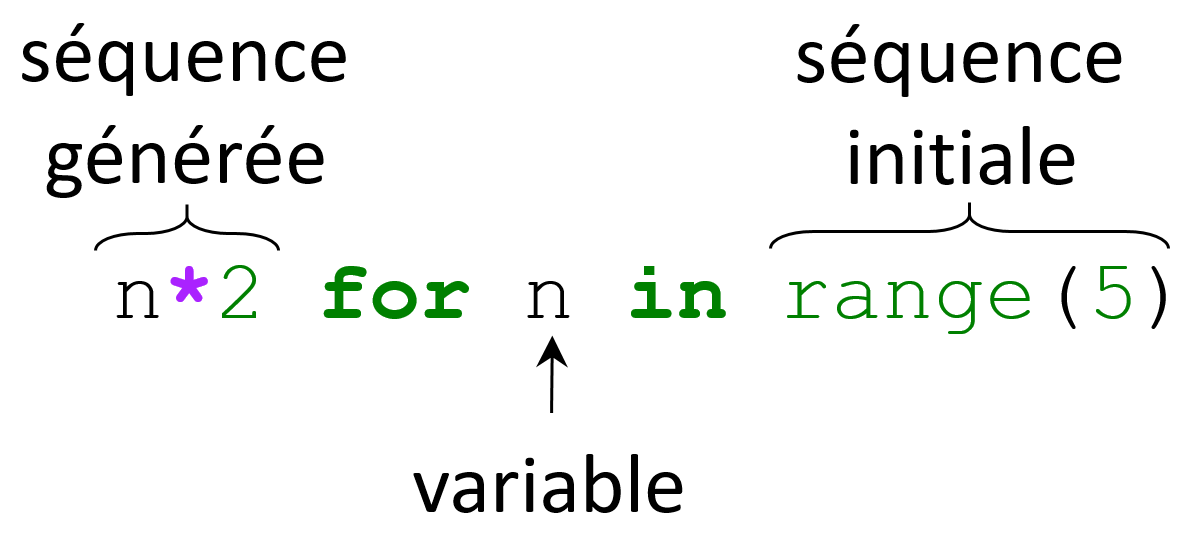
</div>
    
The `n` variable is iteratively generated by the loop that browses the initial sequence, and the set of values taken by this variable is used to create the expected sequence.

And these Comprehension instructions can be used to create lists. In this case, this is known as [List Comprehension](https://www.programiz.com/python-programming/list-comprehension) in Python (which some translate as _comprehension list_ or _list by comprehension_)&nbsp;:

In [60]:
even = [n*2 for n in range(5)]

print(even)

[0, 2, 4, 6, 8]


This Comprehension List successively generates the first 5 integers (with <code class="cm-s-ipython language-python"><span class="cm-builtin">range</span>()</code>), and squares them each time.

We can similarly apply them to dictionaries (no longer looping with an `n` variable but with an `index,value` tuple), and to sets. And here, you’ve guessed it, we are talking about [Dictionary Comprehension] (https://www.geeksforgeeks.org/python-dictionary-comprehension/) and [Set Comprehension](https://medium.com/swlh/set-comprehension-in-python3-for-beginners-80561a9b4007). However, this is not possible with tuples, whose immutability would make the implementation of a Tuple Comprehension particularly complex. If you still need to create a tuple by Comprehension, you can use the [<code class="cm-s-ipython language-python"><span class="cm-builtin">tuple</span>()</code>](https://skytowner.com/explore/python_tuple_constructor) constructor, by attributing a Comprehension to it as a parameter (no need to put it in a container)&nbsp;:

In [61]:
t = tuple(n*2 for n in range(5))

print(t)

(0, 2, 4, 6, 8)


Moreover, an additional condition can be included in a Comprehension, which will allow to consider in the initial sequence only those values which respect this condition. In this case, we are talking about [Conditional comprehension](https://riptutorial.com/python/example/767/conditional-list-comprehensions). Let’s say that we want to generate a list containing only the even values of an existing array (knowing that checking if a value is even is simply done thanks to the [modulo][modulo](https://www.geeksforgeeks.org/what-is-a-modulo-operator-in-python/))&nbsp;:

In [63]:
my_list = [7, 54, 32, 9845, 185, 321, 84, 6]
even = [n for n in my_list if n%2==0]

print(even)

[54, 32, 84, 6]


We simply added a filter condition&nbsp;:
<div>
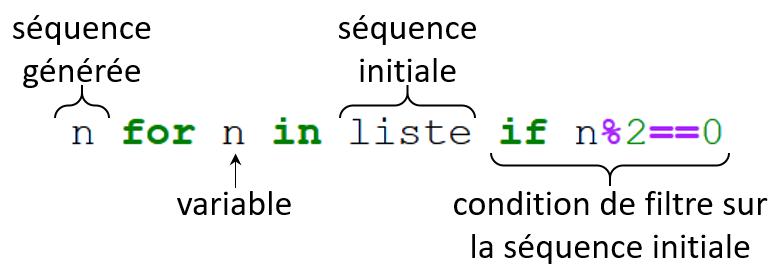
</div>

This is where we find the algebraic origin of this feature. The notion comes originally from set theory, which makes it possible to define a set in [comprehension](https://en.wikipedia.org/wiki/Set_(mathematics) . You may have already seen this way of writing a set . If we apply it to the example of even numbers that we saw above, it gives this notation&nbsp;:

$\{x \in liste ~|~ x \text{ is even}\}$

But in Python, we can add a calculation as in the first example. And in this example, we also see that we don't have to put a condition. But if we need it, we can. On the other hand, in theory, you can't put an <code class="cm-s-ipython language-python"><span class="cm-keyword">else</span></code>, but there is a technique that still allows you to do it. For example, this allows us to replace all the odd values of a sequence with 0&nbsp;:

In [64]:
even = [n if n%2==0 else 0 for n in my_list]

print(even)

[0, 54, 32, 0, 0, 0, 84, 6]


You will notice in this case that the order of the elements is no longer the same, the <code class="cm-s-ipython language-python"><span class="cm-keyword">for</span></code> comes after the <code class="cm-s-ipython language-python"><span class="cm-keyword">if</span></code>. This is because we no longer really use a conditional comprehension, but we actually use the [ternary operator](https://riptutorial.com/python/example/3226/conditional-expression--or--the-ternary-operator--) in the expression of the generated sequence&nbsp;:
<div>
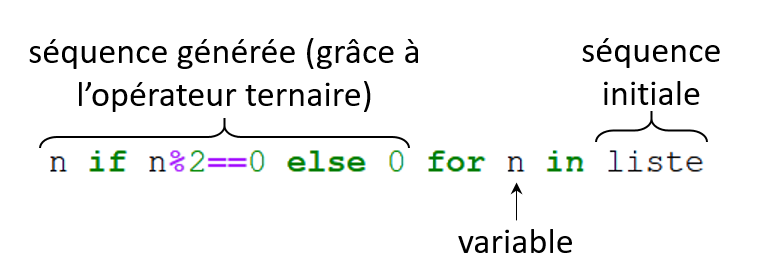
</div>

Moreover, the ternary operator is also very useful, you can use it elsewhere than in a Comprehension.

And since a Comprehension uses a sequence to generate another one, we can absolutely nest the Comprehension&nbsp;! It may seem complicated, but the use cases come faster than we imagine. The typical example is that of the matrix that we want to _flatten_, i.e. convert into a vector, by putting all the values after&nbsp;:

In [6]:
print(my_matrix)

vector = [val for row in my_matrix for val in row]

print(vector)

[[0, 1, 2], [3, 4, 5], [6, 7]]
[0, 1, 2, 3, 4, 5, 6, 7]


The operation of Nested Comprehensions is recursive. From the initial sequence (the matrix) the variable 1 generates intermediate sequences which are the different lines, each one being used as initial sequence on which the variable 2 will generate the different values of the queue in question.&nbsp;

<div>
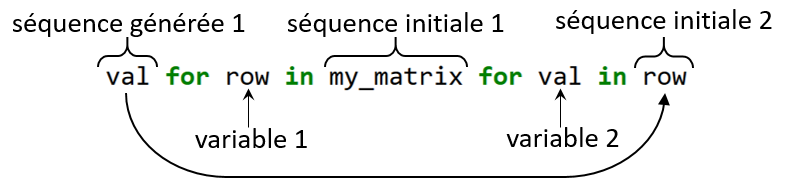
</div>

The operation of Nested Comprehensions is recursive. From the initial sequence (the matrix) the variable 1 generates intermediate sequences which are the different rows, each one being used as initial sequence on which the variable 2 will generate the different values of the row in question:
<div>
<img src="attachment:condcompr3.png" width="600"/>
</div>

## 2.4 Generators

A generator is a function that returns an _iterator_ (a type of iterable, it's a matter of duck typing, we're talking about it at the end of this exercise series), on which we can loop with a <code class="cm-s-ipython language-python"><span class="cm-keyword">for</span></code>. And creating a function generator is very simple&nbsp;! Simply use the keyword [<code class="cm-s-ipython language-python"><span class="cm-keyword">yield</span></code>] (https://https://docs.python.org/fr/3/reference/expressions.html#yieldexpr), as on the following example&nbsp;:

```python
return
```

In [66]:
def squarre(n):
 for i in range(n):
 yield i*i

At each iteration, this <code class="cm-s-ipython language-python"><span class="cm-def">square</span>()</code> function generates a square and returns it, but continues to execute (in fact, it pauses and waits for the next call, but it doesn't change anything for us). Basically, <code class="cm-s-ipython language-python"><span class="cm-keyword">yield</span></code> is a kind of <code class="cm-s-ipython language-python"><span class="cm-keyword">return</span></code>, but it does not interrupt the execution of the function, which makes it possible to return several successive values. And we can use the function <code class="cm-s-ipython language-python"><span class="cm-def">square</span></code> like the usual iterables&nbsp;:

In [67]:
for i in squarre(5):
 print(i)

0
1
4
9
16


This feature will be very useful in one of the workshops of this course.

Note that <code class="cm-s-ipython language-python"><span class="cm-keyword">yield</span></code> performance varies a lot depending on the context, it is not necessarily the fastest solution in terms of code execution. But it is often the most memory efficient due to the [lazy evaluation](https://en.wikipedia.org/wiki/Lazy_evaluation).

## 2.5 Memoization
Here, we are moving away a little from the control structures, but it is still about processing. Behind this barbaric [memoization]((https://en.wikipedia.org/wiki/Memoization) term, there is a very simple idea&nbsp;: if a function is called several times *with the same values of input parameters *, it is useless to execute it several times, once is enough. You just have to put the result in a cache memory , and return it at each new call on the same values (basically, it's a proxy system). If these calls are frequent, a lot of time is saved, especially if the access to the cache is fast. This is the same principle that is used in the _dynamic programming_ algorithm that you will soon see, except that memoization proceeds from top to bottom, whereas dynamic programming proceeds from bottom to top.

If we were to implement this mechanism ourselves, it would be a bit complicated. It would be necessary to encapsulate the function that one wants to memoize in another function, which would use a structure adapted for the cache, probably a dictionary which associates the data of input parameter (more precisely a key obtained by hashing of the data from input parameter) to the output data (value). In short, a lot of work...

But in Python, since version 3.2, it's very simple, there is a [library Python] (https://docs.python.org/3/library/functools.html#functools.cache) that handles the caching of function return values. All you have to do is add a [decorator](https://www.programiz.com/Python-programming/decorator) to the function to be cached, and the library will automatically encapsulate it.

To test this, we will implement a recursive function that computes a factorial. As this function is recursive, many calls will be made with the same values (if you don't see why, think about the mathematical formula of a factorial). We will test it once without memoization, and once with, and we will compare the running time. On the other hand, it will be necessary to increase the number of recursive calls that Python allows.

In [68]:
# increase the number of recursive calls allowed by Python
import sys
sys.setrecursionlimit(2000)

# first calculation
def factorial(n):
 if n > 0:
 return n * factorial(n-1)
 else:
 return 1

print("first computation")
%timeit factorial(800)

from functools import lru_cache

@lru_cache(maxsize=None)
def factorial(n):
 if n > 0:
 return n * factorial(n-1)
 else:
 return 1

print("\nsecond computation")
%timeit factorial(800)

first computation
350 µs ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

second computation
97.3 ns ± 9.12 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Indeed, the first time, the calculation took a little time, the second was almost instantaneous. What if we try with a smaller value&nbsp;?

In [69]:
%timeit factorial(400)

119 ns ± 7.58 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


One might have expected it to still take a little time, but it is not. Simply because the function is recursive, so the call with the value ''400'' has already been made when calculating the value ''800''. And if we calculate the factorial of ''801'', it will be very fast too, since there will be only one new calculation to do when calling the function (in other words, we will not see the difference).

In [70]:
%timeit factorial(801)

89.2 ns ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


If you are in a situation where memoization can be useful, you should not deprive yourself of this feature, which sometimes radically speeds up the calculations (we have already seen cases of division by 20 of the computation time).
This cache memory consumes RAM. If you saturate your memory, it could be annoying. To avoid this, you can, in your decorator, change the value of the parameter ‘maxsize’. But hey, given the memory capacities of modern machines, you have some leeway…

On the other hand, we cannot use memoization on any function &nbsp;:
* Already, it must be _deterministic_, the result returned by this function must depend only on the values of input parameter (for example, there must be no randomness in this function).
* Then, this function must have no _side effect_, i.e. the call to the function does not cause any change in the rest of the environment (outside the function itself). This property is sometimes called [referential transparency](https://en.wikipedia.org/wiki/Referential_transparency) (even though this is inaccurate, as side effects can also come from the use of global variables). A function using the `pop` method of a dictionary in variable, for example, cannot be memoized, since it modifies the contents of the dictionary.

Such functions, which are deterministic and have no side-effect, are called _pure_, and they are the only ones that can be memoized without causing an error in the program (which is quite logical). Moreover, the generators, which we saw above, cannot be saved. This is quite logical since they are designed to save memory, unlike memoization which uses it to speed up processing. These are two typical examples of different [space–time tradeoffs](https://en.wikipedia.org/wiki/Space%E2%80%93time_tradeoff).

Memoization is an important technique in code optimization, feel free to study the [different caching strategies](https://realpython.com/lru-cache-Python/). It is also a method that can be used in all languages, even if it is rare to have an implementation as simple to implement as in Python. Most of the time, you have to implement the cache mechanism yourself (with a `ConcurrentHashMap` in Java for example, or a `std::unordered_map` in C++).

## Conclusion
We have seen some advanced control structures, some of which may be redundant. In particular, manipulating a sequence (list or other) to extract a sub set from it can often be done either by slicing, or by Comprehension . Depending on the case, some implementations will have better performance, and the choice is often made by trial and comparison of running time. There is no general rule (although it is quite rare that implement a loop manually is the fastest solution when you can do otherwise). In addition, we did not go into the details of the implementation of the different features. For example, we didn't distinguish between `iterable` and `iterator` (one being a special case of the other). But this first discovery now allows you to explore more rigorously all these possibilities offered by Python.

And there is still a lot to discover. The [<code class="cm-s-ipython language-python"><span class="cm-builtin">all</span></code> and <code class="cm-s-ipython language-python"><span class="cm-builtin">any</span></code>] statements (https://www.geeksforgeeks.org/any-all-in-Python/) greatly simplify the writing of conditions. The [<code class="cm-s-ipython language-python"><span class="cm-builtin">map</span></code>](https://www.geeksforgeeks.org/python-map-function/) and [<code class="cm-s-ipython language-python"><span class="cm-builtin">zip</span></code>](https://www.geeksforgeeks.org/zip-in-python/) functions (which are not, strictly speaking, control structures, but simply functions that can replace them) are great classics that really allow us to do many things (particularly to compensate for the absence of `case`, but which we have also used in another way in this exercise series). [Unpacking operators](https://towardsdatascience.com/unpacking-operators-in-python-306ae44cd480) can be of great help when we handle collections. [<code class="cm-s-ipython language-python"><span class="cm-builtin">Filter</span></code>](https://www.w3schools.com/python/ref_func_filter.asp) is also very useful, as it allows us to filter an iterable, exactly like a conditional Comprehension without calculation, but often much faster (up to 3 times faster on simple data). If you just need to simply filter a collection, without calculation or other modification of its contents, this solution is often preferable (it's up to you to test on the cases you are interested in). Especially since there is a way to use it as concisely as Comprehension, using an anonymous function.

The [anonymous functions](https://en.wikipedia.org/wiki/Anonymous_function), precisely called _lambda functions_ in Python, are a feature that can be very useful (not only with <code class="cm-s-ipython language-python"><span class="cm-builtin">filter</span></code>, but also with <code class="cm-s-ipython language-python"><span class="cm-builtin">map</span></code> and <code class="cm-s-ipython language-python"><span class="cm-builtin">zip</span></code>, and in many other contexts). Java also offers a version of it, called _expressions lambda_. This principle comes from [functional programming](https://en.wikipedia.org/wiki/Functional_programming), which for a long time remained a rather minority approach to programming, but which is experiencing a revival of popularity for several years. The term _lambda_ comes from [lambda calculus](https://en.wikipedia.org/wiki/Lambda_calculus), the formal model of computation on which the functional programming is based, in the same way that the procedural programming that you know is based on the model of computation of the Turing machines that you will discover in this course.

Moreover, it is also functional programming that brought to Python the concept of pure function, immutable structure, and iterators. [Mastering its concepts](https://menziess.github.io/howto/use/functional-programming-in-python/) will allow you to make the best use of these features.

# End of the exercise series

That’s it&nbsp;! We quickly touched on some important aspects of code performance in Python, but in the end we only did [hover over the topic](https://wiki.Python.org/moin/PythonSpeed/PerformanceTips). The need to consult and study the Python documentation cannot be overemphasized. Knowing in depth how all these tools function is essential if you want to use them wisely.

<div class="alert alert-warning">
here we use Python&nbsp;3, and there are quite a few differences with Python&nbsp;2, so be careful when documenting yourself.
</div>

Keep up to date with developments in Python. Current work on Python focuses a lot on performance, and new computational tools are regularly implemented. Simply changing the minor version of the interpreter can save you time at runtime! For example, one of the algorithms you are going to implement saved 5 % of computation time, just by switching from Python&nbsp;3.9.7 to Python&nbsp;3.9.12. On an execution that takes a few tens of minutes or a few hours, it counts (just imagine for several days!).

Moreover, the running time comparisons that we made between the instantiation of a list and that of a tuple are an excellent reflex to have, which you can apply to the rest of this exercise series (try on the `deque`, you will see that the gain compared to a list is not so easy to predict). And whenever you hesitate about an implementation (whether at the level of a structure or a statement), get into the habit of comparing the different approaches in this way. In worst-case scenario, do it on large amounts of data (we will see how to generate it throughout this course). Experimentation remains essential to validate a technical choice of implementation. And if you want to go further (you never know...), there are many [profiling tools](https://toucantoco.com/en/tech-blog/tech/python-performance-optimization) that allow you to examine very precisely what happens during the execution of a code (some of them are accessible from Jupyter with a Magic command). These tools are very important, because before wanting to optimize a code, it is necessary to [identify the bottlenecks](https://learntutorials.net/en/python/topic/5889/performance-optimization), so as not to spend too much time on a part of the code that has little impact on your performance.

A focal point for those who would like to parallelize their code (by the way, in Python [threads](https://realpython.com/intro-to-python-threading/) are really easy to use) some features are not [thread-safe](https://en.wikipedia.org/wiki/Thread_safety). If you want to perform multi-threaded processing, it will be necessary, in addition to dead-lock and worm-lock problems of your own code, to pay attention to this point. In particular, iterative processing on data structures is sometimes not thread-safe by default (it depends on the data structure used), it’s up to you to secure your code. That said, if you hope to speed up the processing tasks thanks to this you may be a little disappointed...